In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\timos\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
engagement = pd.read_csv('takehome_user_engagement.csv')

In [3]:
users = pd.read_csv('takehome_users.csv',engine='python')

In [4]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])

In [5]:
engagement['time_stamp'] = engagement['time_stamp'].dt.floor('d').astype(np.int64)

engagement = engagement.sort_values(['user_id', 'time_stamp']).drop_duplicates()

windowed = engagement.groupby('user_id')['time_stamp'].rolling(window=3)
difference = pd.to_timedelta((windowed.max()- windowed.min())).dt.days

result = difference[difference<=7].index.get_level_values('user_id').drop_duplicates().to_list()

In [6]:
adopted_user = pd.DataFrame(data=result,columns=['object_id'])

In [7]:
adopted_user['adopted_user'] = 1

In [8]:
df = users.merge(adopted_user,how='outer',on='object_id')

In [9]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN


In [10]:
df.isnull().sum()

object_id                         0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time     3177
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id             5583
adopted_user                  10344
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted_user                1656 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


In [15]:
print((len(adopted_user)/len(df))*100)

13.8


In [17]:
df['adopted_user'].fillna(0,inplace=True)
df['invited_by_user_id'].fillna(0,inplace=True)

In [20]:
df.last_session_creation_time.describe()

count    8.823000e+03
mean     1.379279e+09
std      1.953116e+07
min      1.338452e+09
25%      1.363195e+09
50%      1.382888e+09
75%      1.398443e+09
max      1.402067e+09
Name: last_session_creation_time, dtype: float64

In [22]:
df['last_session_creation_time'] = pd.to_datetime(df['last_session_creation_time'],unit='s')

In [24]:
df['creation_time'] = pd.to_datetime(df['creation_time'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
 10  adopted_user                12000 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)


In [35]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

rows_with_NaN.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,0.0,0.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,0.0,0.0
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaT,0,0,130,9270.0,0.0
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,175,0.0,0.0
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,211,0.0,0.0


In [39]:
rows_with_NaN['adopted_user'].describe()

count    3177.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: adopted_user, dtype: float64

In [40]:
df['last_session_creation_time'].fillna(df['creation_time'], inplace=True)

In [41]:
df.iloc[7]

object_id                                              8
creation_time                        2013-07-31 05:34:02
name                                   Hamilton Danielle
email                         DanielleHamilton@yahoo.com
creation_source                        PERSONAL_PROJECTS
last_session_creation_time           2013-07-31 05:34:02
opted_in_to_mailing_list                               1
enabled_for_marketing_drip                             1
org_id                                                74
invited_by_user_id                                     0
adopted_user                                           0
Name: 7, dtype: object

In [49]:
engagement[engagement.user_id == 8]

,time_stamp,user_id,visited


In [51]:
df['email'] = df['email'].astype(str)

In [93]:
df[['email_name','email_domain']] = df['email'].str.split('@',expand=True)
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,email name,email domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,AugustCClausen,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0,MatthewPoole,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,MitchellBottrill,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0,NicklasSClausen,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0,GraceRaw,yahoo.com


In [95]:
df['email domain'].nunique()

1184

In [53]:
print(df.columns)

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'adopted_user'],
      dtype='object')


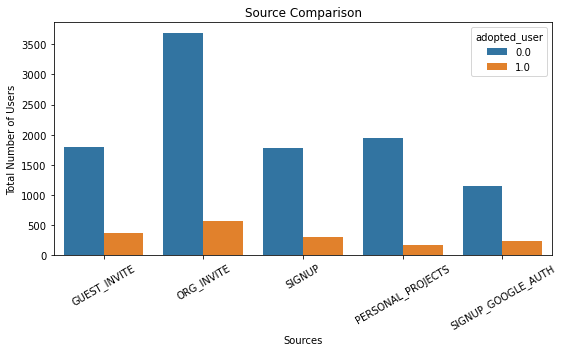

In [123]:
plt.figure(figsize=(8,5))
sns.countplot(x='creation_source',hue='adopted_user',data=df)

plt.xlabel("Sources")
plt.xticks(rotation=30)
plt.ylabel("Total Number of Users")
plt.title("Source Comparison")
plt.tight_layout()
plt.savefig('creation_source.png')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
 10  adopted_user                12000 non-null  float64       
 11  email name                  12000 non-null  object    

In [101]:
df['creation_year'] = pd.DatetimeIndex(df['creation_time']).year
df['creation_month'] = pd.DatetimeIndex(df['creation_time']).month

In [102]:
df['last_session_year'] = pd.DatetimeIndex(df['last_session_creation_time']).year
df['last_session_month'] = pd.DatetimeIndex(df['last_session_creation_time']).month

In [103]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,email name,email domain,creation_year,creation_month,last_session_year,last_session_month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,AugustCClausen,yahoo.com,2014,4,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0,MatthewPoole,gustr.com,2013,11,2014,3
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,MitchellBottrill,gustr.com,2013,3,2013,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0,NicklasSClausen,yahoo.com,2013,5,2013,5
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0,GraceRaw,yahoo.com,2013,1,2013,1


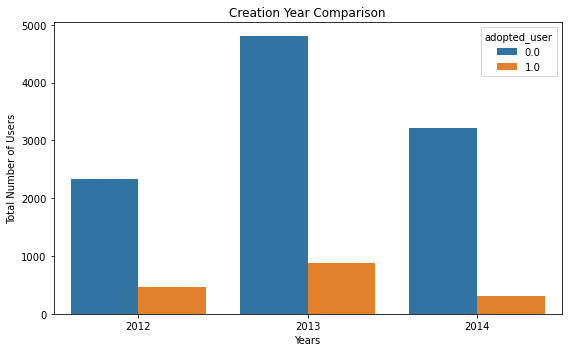

In [122]:
plt.figure(figsize=(8,5))
sns.countplot(x='creation_year',hue='adopted_user',data=df)
plt.xlabel("Years")
plt.ylabel("Total Number of Users")
plt.title("Creation Year Comparison")
plt.tight_layout()
plt.savefig('creation_year.png')

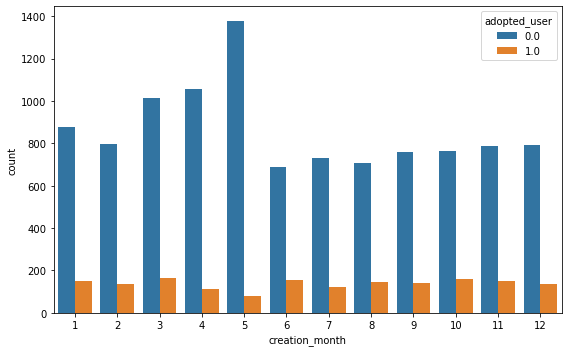

In [105]:
plt.figure(figsize=(8,5))
sns.countplot(x='creation_month',hue='adopted_user',data=df)
plt.tight_layout()

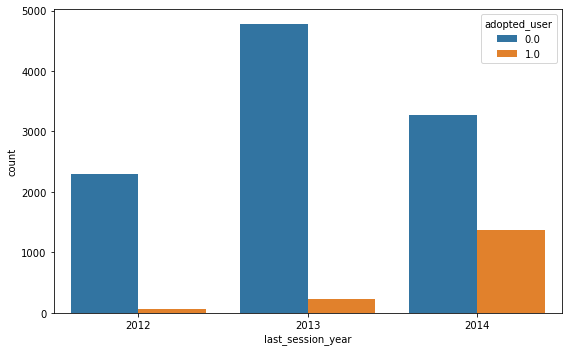

In [106]:
plt.figure(figsize=(8,5))
sns.countplot(x='last_session_year',hue='adopted_user',data=df)
plt.tight_layout()

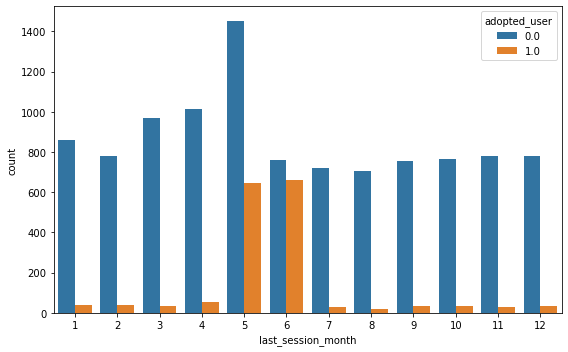

In [107]:
plt.figure(figsize=(8,5))
sns.countplot(x='last_session_month',hue='adopted_user',data=df)
plt.tight_layout()

In [109]:
df.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'adopted_user', 'email name', 'email domain', 'creation_year',
       'creation_month', 'last_session_year', 'last_session_month'],
      dtype='object')

In [110]:
df1 = df.drop(columns=['object_id', 'creation_time', 'name', 'email', 'creation_source','email name', 'email domain'])

<AxesSubplot:>

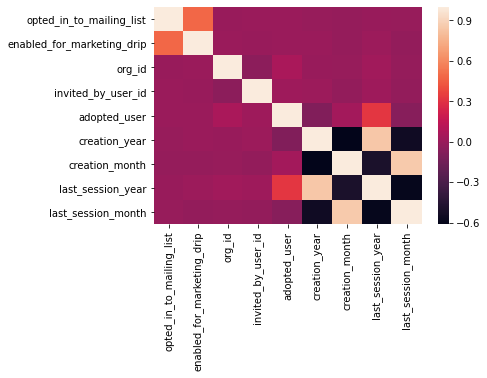

In [112]:
sns.heatmap(df1.corr())

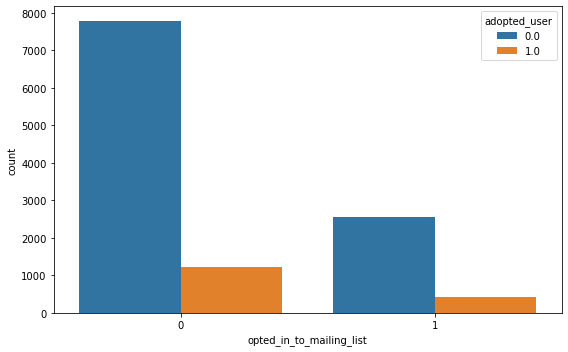

In [113]:
plt.figure(figsize=(8,5))
sns.countplot(x='opted_in_to_mailing_list',hue='adopted_user',data=df)
plt.tight_layout()

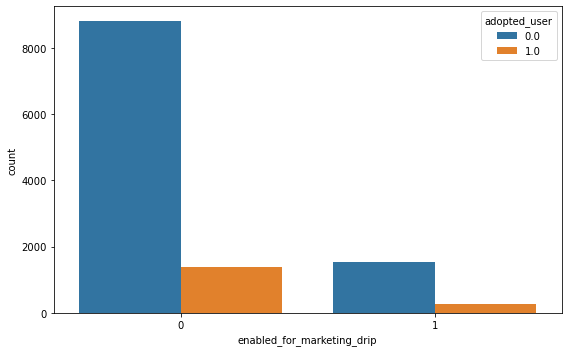

In [114]:
plt.figure(figsize=(8,5))
sns.countplot(x='enabled_for_marketing_drip',hue='adopted_user',data=df)
plt.tight_layout()

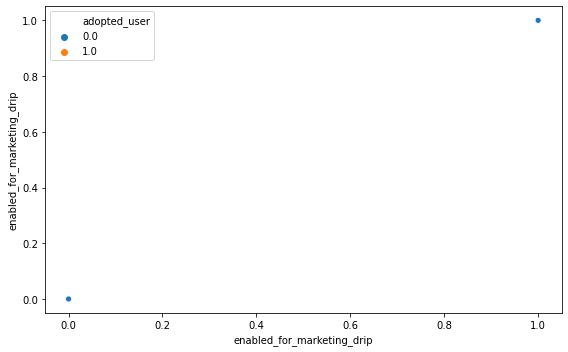

In [115]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='enabled_for_marketing_drip',y='enabled_for_marketing_drip',hue='adopted_user',data=df)
plt.tight_layout()

In [118]:
df['org_id'].nunique()

417

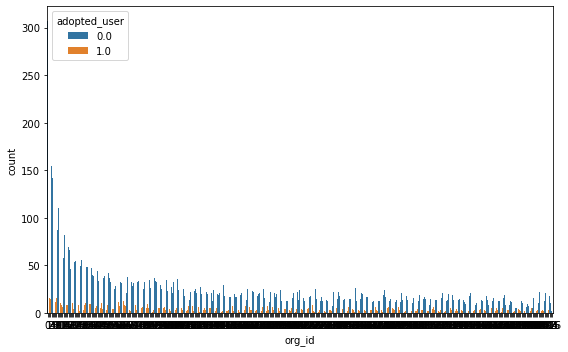

In [119]:
plt.figure(figsize=(8,5))
sns.countplot(x='org_id',hue='adopted_user',data=df)
plt.tight_layout()